In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d


In [57]:
orthogonal_devices = pd.read_csv("rv_study/orthogonal_devices.csv")

Text(0.5, 1.0, 'Performance Span of Orthogonal Devices')

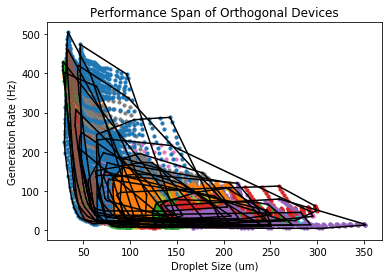

In [60]:
devices = orthogonal_devices.to_dict(orient='records')
score = []
for device in devices:
    features = device.copy()
    del features["Chip #"]
    sizes, rates = sweep_results(device, sweep_size=25)
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    score.append(hull.area)
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
plt.title("Performance Span of Orthogonal Devices")

In [61]:
score

[1027.0721780405902,
 833.1597650771008,
 912.8813803505375,
 675.0437549682995,
 567.1294367974816,
 936.8307329226317,
 485.09644811309903,
 904.1925070619947,
 505.98144391196956,
 483.9549015126685,
 968.0277009514012,
 477.17915714536053,
 553.4785813159369,
 474.0562302495072,
 509.4492389763449,
 497.2354958586904,
 710.307005638807,
 501.63084826275724,
 446.5374556198829,
 369.62528137256317,
 712.494240984997,
 526.414782977107,
 383.0381301634412,
 420.21712187561934,
 484.7122995904223]

In [62]:
orthogonal_devices["score"] = score

In [63]:
orthogonal_devices

,Chip #,orifice_size,aspect_ratio,expansion_ratio,normalized_water_inlet,normalized_oil_inlet,normalized_orifice_length,score
0,1,75,1.0,2,2.0,2.0,1.0,1027.072178
1,2,75,1.5,3,2.5,2.5,1.5,833.159765
2,3,75,2.0,4,3.0,3.0,2.0,912.881380
3,4,75,2.5,5,3.5,3.5,2.5,675.043755
4,5,75,3.0,6,4.0,4.0,3.0,567.129437
5,6,100,1.0,3,3.5,4.0,2.0,936.830733
6,7,100,1.5,4,4.0,2.0,2.5,485.096448
7,8,100,2.0,5,2.0,2.5,3.0,904.192507
8,9,100,2.5,6,2.5,3.0,1.0,505.981444
9,10,100,3.0,2,3.0,3.5,1.5,483.954902


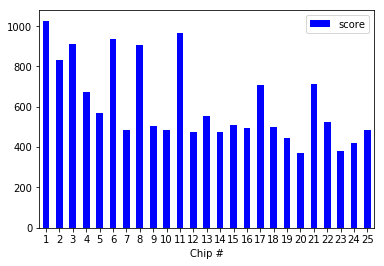

In [72]:
orthogonal_devices.plot.bar(x="Chip #", y="score", rot=0, color="b")